In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
np.random.seed(42)
mnist = fetch_openml('mnist_784', version=1)

In [3]:
Y = mnist.target.astype(int)

In [4]:
x_train = mnist.data.iloc[:49_000]
x_test = mnist.data.iloc[49_000:]

y_train = Y.iloc[:49_000]
y_test = Y.iloc[49_000:]

In [5]:
y_train.iloc[-1]

6

In [6]:
# Q2:

x_train_69 = np.r_[x_train[y_train == 6].values, x_train[y_train == 9].values]
y_train_69 = np.r_[y_train[y_train == 6].values, y_train[y_train == 9].values]

In [7]:
y_train_69[y_train_69 == 6] = 1
y_train_69[y_train_69 == 9] = 0

In [8]:
import matplotlib.pyplot as plt

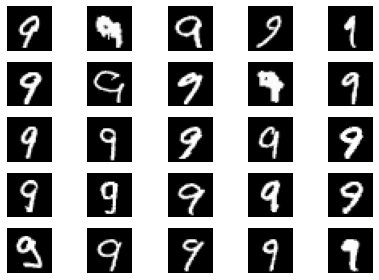

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=5)
ax = ax.ravel()

pos = x_train_69[y_train_69 == 0]
for _ax, choice_ix in zip(ax, np.random.choice(np.arange(len(pos)), size=25)):
    _ax.imshow(pos[choice_ix].reshape(28, 28), cmap=plt.cm.gray)
    _ax.set_axis_off()
plt.tight_layout()

In [11]:
from sklearn.utils import shuffle

In [12]:
x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state=1729)

In [13]:
## For test set
x_test_69 = np.r_[x_test[y_test == 6].values, x_test[y_test == 9].values]
y_test_69 = np.r_[y_test[y_test == 6].values, y_test[y_test == 9].values]

y_test_69[y_test_69 == 6] = 1
y_test_69[y_test_69 == 9] = 0




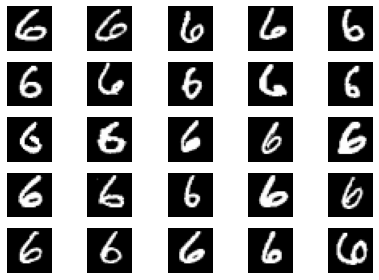

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=5)
ax = ax.ravel()

pos = x_test_69[y_test_69 == 1]
for _ax, choice_ix in zip(ax, np.random.choice(np.arange(len(pos)), size=25)):
    _ax.imshow(pos[choice_ix].reshape(28, 28), cmap=plt.cm.gray)
    _ax.set_axis_off()
plt.tight_layout()

In [16]:
x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state=1729)

In [17]:
y_train_69.sum()

4855

In [18]:
y_train_69

array([1, 0, 1, ..., 1, 1, 1])

In [19]:
y_test_69.sum()

2021

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x_train_69tf = scaler.fit_transform(x_train_69)

In [22]:
x_train_69tf[0].mean()

0.08128379559427823

In [23]:
x_train_69tf[:, 0].mean()

0.0

In [24]:
x_train_69tf[0].std()

0.7358823226037738

In [25]:
x_train_69tf[:, 0].std()

0.0

In [21]:
# Q5
from sklearn.linear_model import SGDClassifier

* No Regularization
* random_state : 10
* Iteration : 10

### A: Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `
### B.Set learning rate to 0.000001 and fit the model with `x_train_69 `.
### C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
### D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [25]:
from sklearn.metrics import log_loss

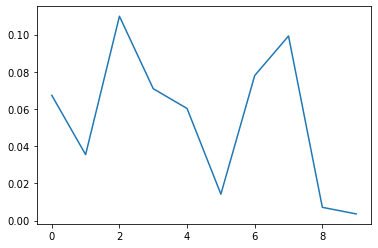

In [39]:
# A
clf = SGDClassifier(loss='log', random_state=10, alpha=0, eta0=0.01, learning_rate='constant')
loss = []
for i in range(10):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    loss.append(log_loss(y_train_69, clf.predict(x_train_69)))
plt.plot(loss)

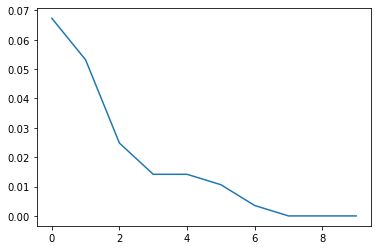

In [40]:
# B
clf = SGDClassifier(loss='log', random_state=10, alpha=0, eta0=0.000001, learning_rate='constant')
loss = []
for i in range(10):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    loss.append(log_loss(y_train_69, clf.predict(x_train_69)))
plt.plot(loss)

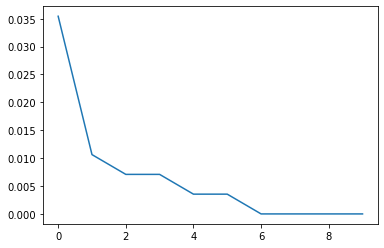

In [41]:
# C
clf = SGDClassifier(loss='log', random_state=10, alpha=0, eta0=0.01, learning_rate='constant')
loss = []
for i in range(10):
    clf.partial_fit(x_train_69tf, y_train_69, classes=[0, 1])
    loss.append(log_loss(y_train_69, clf.predict(x_train_69tf)))
plt.plot(loss)

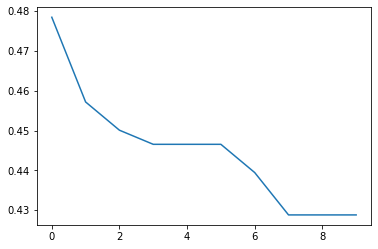

In [42]:
# D
clf = SGDClassifier(loss='log', random_state=10, alpha=0, eta0=0.1, learning_rate='invscaling', power_t=1)
loss = []
for i in range(10):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    loss.append(log_loss(y_train_69, clf.predict(x_train_69)))
plt.plot(loss)

In [32]:
SGDClassifier?

Init signature:
SGDClassifier(
    loss='hinge',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)
Docstring:     
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.

